In [68]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [64]:
os.getcwd()
exam_data = pd.read_csv('Data/exams.csv', quotechar='"')
exam_data

gender race/ethnicity parental level of education         lunch  \
0   female        group D            some high school      standard   
1     male        group C          associate's degree      standard   
2     male        group C                 high school      standard   
3     male        group B            some high school      standard   
4     male        group D                some college      standard   
..     ...            ...                         ...           ...   
95    male        group B                some college      standard   
96  female        group C                some college  free/reduced   
97    male        group C           bachelor's degree  free/reduced   
98    male        group D          associate's degree      standard   
99  female        group B           bachelor's degree      standard   

   test preparation course  math score  reading score  writing score  
0                     none          59             77             73  
1                     none          72             73             69  
2                     none          55             55             52  
3                     none          49             43             34  
4                     none          69             59             61  
..                     ...         ...            ...            ...  
95                    none          72             66             64  
96                    none          46             52             51  
97                    none          69             62             63  
98               completed          86             89             91  
99                    none          76             88             83  

[100 rows x 8 columns]

In [65]:
# Exploring numerical data
math_average = exam_data['math score'].mean()
math_sd = exam_data['math score'].std()
print('math avg', math_average)
print('math std', math_sd)
# General Statistics
exam_data.describe()

math avg 67.38
math std 15.07742978391506


math score  reading score  writing score
count   100.00000     100.000000     100.000000
mean     67.38000      71.390000      70.360000
std      15.07743      13.839553      14.503584
min      31.00000      36.000000      34.000000
25%      56.75000      61.750000      60.750000
50%      68.00000      70.500000      70.000000
75%      78.25000      81.250000      81.250000
max     100.00000     100.000000     100.000000

In [66]:
# Standarizing numerical data: mean = 0 var = 1
from sklearn import preprocessing
exam_data['math score'] = preprocessing.scale(exam_data['math score'])
exam_data['reading score'] = preprocessing.scale(exam_data['reading score'])
exam_data['writing score'] = preprocessing.scale(exam_data['writing score'])
exam_data.describe()


math score  reading score  writing score
count  1.000000e+02   1.000000e+02   1.000000e+02
mean   3.119727e-16  -3.996803e-17   4.773959e-17
std    1.005038e+00   1.005038e+00   1.005038e+00
min   -2.425034e+00  -2.570046e+00  -2.519596e+00
25%   -7.085791e-01  -7.000634e-01  -6.659329e-01
50%    4.132823e-02  -6.463241e-02  -2.494650e-02
75%    7.245771e-01   7.160399e-01   7.546315e-01
max    2.174398e+00   2.077678e+00   2.053928e+00

In [67]:
# Exploring categorical data
print('values in parental level of Ed',exam_data['parental level of education'].unique())
print('values in group/ethnicity ',exam_data['race/ethnicity'].unique())
exam_data['race/ethnicity'].value_counts()

values in parental level of Ed ['some high school' "associate's degree" 'high school' 'some college'
 "bachelor's degree" "master's degree"]
values in group/ethnicity  ['group D' 'group C' 'group B' 'group E' 'group A']


group D    38
group C    26
group B    19
group E    11
group A     6
Name: race/ethnicity, dtype: int64

In [60]:
# Changing categorical columns to numerical 
le = preprocessing.LabelEncoder() # works good for binary classes
exam_data['gender'] = le.fit_transform(exam_data['gender'].astype(str))
exam_data.head()

gender race/ethnicity parental level of education     lunch  \
0       0        group D            some high school  standard   
1       1        group C          associate's degree  standard   
2       1        group C                 high school  standard   
3       1        group B            some high school  standard   
4       1        group D                some college  standard   

  test preparation course  math score  reading score  writing score  
0                    none   -0.558598       0.407402       0.182941  
1                    none    0.307962       0.116919      -0.094242  
2                    none   -0.825231      -1.190253      -1.272271  
3                    none   -1.225182      -2.061701      -2.519596  
4                    none    0.107987      -0.899770      -0.648609

In [61]:
exam_data = pd.get_dummies(exam_data, columns=['parental level of education', 
                                               'lunch', 
                                               'test preparation course']) # multiple categories as matrix (one hot representation)
exam_data

gender race/ethnicity  math score  reading score  writing score  \
0        0        group D   -0.558598       0.407402       0.182941   
1        1        group C    0.307962       0.116919      -0.094242   
2        1        group C   -0.825231      -1.190253      -1.272271   
3        1        group B   -1.225182      -2.061701      -2.519596   
4        1        group D    0.107987      -0.899770      -0.648609   
..     ...            ...         ...            ...            ...   
95       1        group B    0.307962      -0.391425      -0.440721   
96       0        group C   -1.425157      -1.408115      -1.341567   
97       1        group C    0.107987      -0.681908      -0.510017   
98       1        group D    1.241180       1.278850       1.430266   
99       0        group B    0.574596       1.206230       0.875899   

    parental level of education_associate's degree  \
0                                                0   
1                                                1   
2                                                0   
3                                                0   
4                                                0   
..                                             ...   
95                                               0   
96                                               0   
97                                               0   
98                                               1   
99                                               0   

    parental level of education_bachelor's degree  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
..                                            ...   
95                                              0   
96                                              0   
97                                              1   
98                                              0   
99                                              1   

    parental level of education_high school  \
0                                         0   
1                                         0   
2                                         1   
3                                         0   
4                                         0   
..                                      ...   
95                                        0   
96                                        0   
97                                        0   
98                                        0   
99                                        0   

    parental level of education_master's degree  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
..                                          ...   
95                                            0   
96                                            0   
97                                            0   
98                                            0   
99                                            0   

    parental level of education_some college  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          1   
..                                       ...   
95                                         1   
96                                         1   
97                                         0   
98                                         0   
99                                         0   

    parental level of education_some high school  lunch_free/reduced  \
0                                     

Text(0, 0.5, 'writing')

<Figure size 432x288 with 0 Axes>

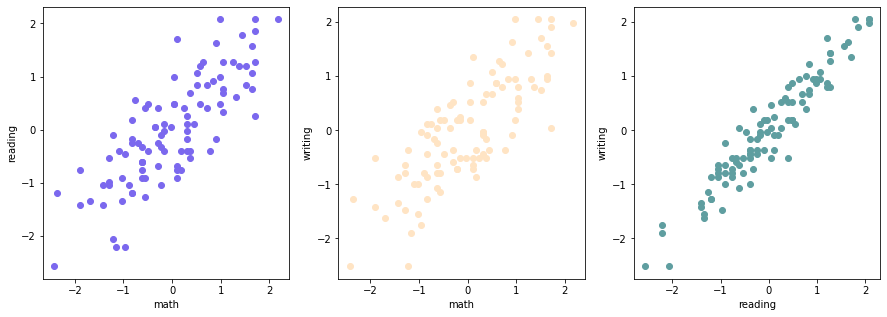

In [92]:
# Exploring data with some scatter graphs
f = plt.figure()
f, axes = plt.subplots(nrows = 1, ncols=3,figsize=(15,5))
axes[0].scatter(exam_data['math score'], exam_data['reading score'], color='mediumslateblue')
axes[0].set_xlabel('math')
axes[0].set_ylabel('reading')
axes[1].scatter(exam_data['math score'], exam_data['writing score'], color = 'bisque')
axes[1].set_xlabel('math')
axes[1].set_ylabel('writing')
axes[2].scatter(exam_data['reading score'], exam_data['writing score'], color= 'cadetblue')
axes[2].set_xlabel('reading')
axes[2].set_ylabel('writing')
